In [1]:
import torch
from diffusers.utils import make_image_grid

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from diffusers.utils.torch_utils import randn_tensor
import cv2

c:\Users\saqib\miniconda3\envs\wacv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.10.11 (you have 3.10.18)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
c:\Users\saqib\miniconda3\envs\wacv\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|██████████| 50/50 [00:10<00:00,  4.75it/s]


OSEG output (1024, 1024, 3)


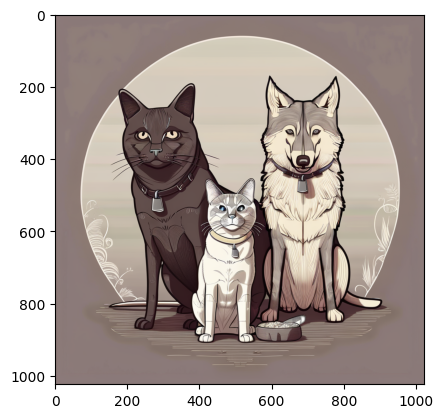

In [2]:

import torch
from diffusers.utils import make_image_grid

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from diffusers.utils.torch_utils import randn_tensor
import cv2
 


### play the game with different prompts and seeds
p32 = "Two dogs, one cat"
prompts = p32
seed = 1621

device = "cuda"
num_inference_steps = 50

#OSEG
from pipeline_oseg import StableDiffusionXLOSEGPipeline
pipe = StableDiffusionXLOSEGPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",torch_dtype=torch.float16)
pipe = pipe.to(device)
generator = torch.Generator(device="cuda").manual_seed(seed)
output_oseg = pipe(prompts,guidance_scale=3.0,seg_scale=3.0,generator=generator,num_inference_steps=num_inference_steps).images[0]
print("OSEG output",np.array(output_oseg).shape)
plt.imshow(output_oseg)
output_oseg.save(f"results_seed/{prompts}_oseg_{seed}.png")